# 실습을 통해 Support Vector Machine 모델 이해하기

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.5, random_state=30)
y[:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [3]:
print(X[:10])
print(X[:10, 0])
print(X[:10, 1])

[[ 3.15838924 -6.74978581]
 [ 3.11038518 -2.57500451]
 [ 2.91212373 -6.54505819]
 [ 3.06658485 -6.77917462]
 [ 3.01261809 -6.8221684 ]
 [ 2.68936249 -3.3486829 ]
 [ 3.3752125  -5.76028423]
 [ 3.2758345  -2.51429663]
 [ 2.31886533 -6.54476888]
 [ 4.35362854 -7.10461635]]
[3.15838924 3.11038518 2.91212373 3.06658485 3.01261809 2.68936249
 3.3752125  3.2758345  2.31886533 4.35362854]
[-6.74978581 -2.57500451 -6.54505819 -6.77917462 -6.8221684  -3.3486829
 -5.76028423 -2.51429663 -6.54476888 -7.10461635]


In [4]:
print(X[y==0])
print(X[y==0, 0])

[[ 3.11038518 -2.57500451]
 [ 2.68936249 -3.3486829 ]
 [ 3.2758345  -2.51429663]
 [ 2.8978846  -2.61003409]
 [ 2.67778621 -2.91256788]
 [ 3.04444742 -2.8809474 ]
 [ 3.37813196 -2.68241186]
 [ 2.33279882 -3.04285225]
 [ 3.83231137 -2.56245503]
 [ 3.15824902 -1.9078523 ]
 [ 2.87998172 -2.61876969]
 [ 2.67136307 -1.85278916]
 [ 2.09187308 -3.0065873 ]
 [ 1.84092241 -1.91613935]
 [ 3.51688461 -2.52604133]
 [ 3.27425897 -3.28164916]
 [ 3.05460221 -3.67969147]
 [ 3.28812118 -2.90741939]
 [ 3.43960678 -3.34561507]
 [ 2.50084681 -2.77262446]
 [ 2.95001902 -2.93845794]
 [ 3.33943374 -3.07890288]
 [ 2.98568729 -2.6150433 ]
 [ 3.5747943  -2.00483766]
 [ 2.83252236 -2.23313361]
 [ 3.37537965 -3.23526284]
 [ 2.01988951 -1.59248252]
 [ 2.683937   -1.87546651]
 [ 2.74004796 -2.11584647]
 [ 2.53825603 -2.81140864]
 [ 2.53216951 -1.96048628]
 [ 2.79616423 -2.49335763]
 [ 2.35421465 -3.02708882]
 [ 3.32235137 -3.13249821]
 [ 3.50379847 -1.53115677]
 [ 3.17041958 -2.63425356]
 [ 3.38415087 -2.90691248]
 

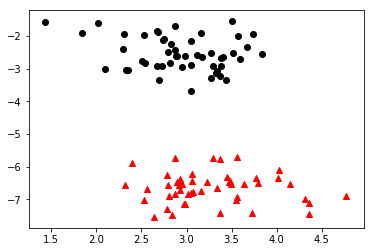

In [5]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='k', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r', marker='^')
plt.show()

In [6]:
model = SVC(kernel='linear', C=1e10).fit(X, y)

- n_support_ : 각 클래스의 서포트의 개수
- support_vectors_ : 각 클래스의 서포트의 x 값
- coef_:  weight
- intercept_:  bias 

In [7]:
model.n_support_

array([1, 2], dtype=int32)

In [8]:
model.support_vectors_

array([[ 3.05460221, -3.67969147],
       [ 3.55843523, -5.68977917],
       [ 2.86846825, -5.74247281]])

In [9]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

In [10]:
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]

In [11]:
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']

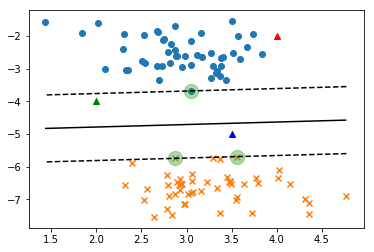

In [12]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1], 
            s=200, alpha=0.4)

x_new = [[4, -2], [3.5, -5], [2, -4]]
plt.scatter(x_new[0][0], x_new[0][1], marker='^', c='r')
plt.scatter(x_new[1][0], x_new[1][1], marker='^', c='b')
plt.scatter(x_new[2][0], x_new[2][1], marker='^', c='g')

plt.show()

In [13]:
model.predict([x_new[0]])

array([0])

In [14]:
model.predict([x_new[1]])

array([1])

In [15]:
model.predict([x_new[2]])

array([0])